# Deep Learning Playground

This notebook demonstrates:
1. **MLP** for tabular data
2. **CNN** for image data
3. **Simple RNN**, **LSTM**, and **GRU** for sequence data

Feel free to adjust hyper‑parameters and architectures to deepen your understanding!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
print('TensorFlow version:', tf.__version__)

Matplotlib is building the font cache; this may take a moment.


TensorFlow version: 2.19.0


## Part 1 – MLP on Titanic

In [3]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic = titanic.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.dropna(inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

C:\Users\sivak\AppData\Local\Temp\ipykernel_21320\1585004622.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [5]:
mlp = models.Sequential([layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

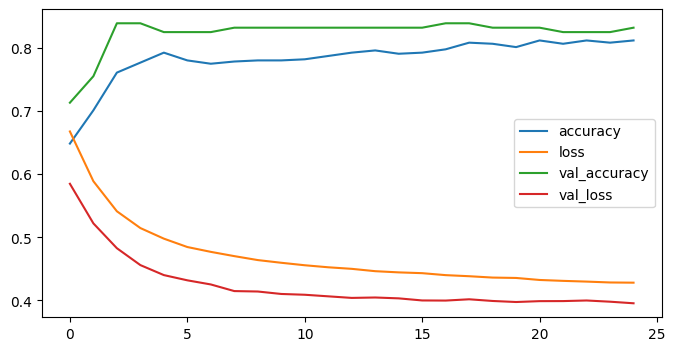

Test accuracy: 0.7988826632499695


In [6]:
hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_split=0.2, verbose=0)
pd.DataFrame(hist.history).plot(figsize=(8,4)); plt.show()
print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

## Part 2 – CNN on MNIST

In [7]:
(X_train_m, y_train_m), (X_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()
X_train_m = X_train_m.astype('float32')/255.
X_test_m = X_test_m.astype('float32')/255.
X_train_m = X_train_m[...,None]
X_test_m = X_test_m[...,None]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

c:\Users\sivak\Documents\Sup de Vinci\Data Science\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
cnn.fit(X_train_m, y_train_m, epochs=5, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/5
422/422 - 12s - 29ms/step - accuracy: 0.9361 - loss: 0.2206 - val_accuracy: 0.9837 - val_loss: 0.0597
Epoch 2/5
422/422 - 10s - 24ms/step - accuracy: 0.9814 - loss: 0.0617 - val_accuracy: 0.9865 - val_loss: 0.0463
Epoch 3/5
422/422 - 10s - 23ms/step - accuracy: 0.9870 - loss: 0.0418 - val_accuracy: 0.9852 - val_loss: 0.0545
Epoch 4/5
422/422 - 10s - 24ms/step - accuracy: 0.9900 - loss: 0.0329 - val_accuracy: 0.9882 - val_loss: 0.0425
Epoch 5/5
422/422 - 10s - 23ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9888 - val_loss: 0.0403
Test accuracy: 0.9894000291824341


## Part 3 – RNNs for Time Series

We'll forecast a sine wave using previous 50 time‑steps.

In [10]:
t = np.linspace(0, 100, 10000)
series = np.sin(t)
window=50
X_seq, y_seq = [], []
for i in range(len(series)-window):
    X_seq.append(series[i:i+window])
    y_seq.append(series[i+window])
X_seq, y_seq = np.array(X_seq)[...,None], np.array(y_seq)
split=int(0.8*len(X_seq))
X_train_s, X_test_s = X_seq[:split], X_seq[split:]
y_train_s, y_test_s = y_seq[:split], y_seq[split:]
print(X_train_s.shape)

(7960, 50, 1)


### Simple RNN

In [11]:
rnn = models.Sequential([layers.SimpleRNN(32, input_shape=(window,1)),
                        layers.Dense(1)])
rnn.compile(optimizer='adam', loss='mse')
rnn.summary()
rnn.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('RNN Test MSE:', rnn.evaluate(X_test_s, y_test_s, verbose=0))

c:\Users\sivak\Documents\Sup de Vinci\Data Science\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 3s - 57ms/step - loss: 0.0322 - val_loss: 7.2988e-04
Epoch 2/5
56/56 - 1s - 12ms/step - loss: 4.3906e-04 - val_loss: 2.7840e-04
Epoch 3/5
56/56 - 1s - 12ms/step - loss: 2.4905e-04 - val_loss: 1.8185e-04
Epoch 4/5
56/56 - 1s - 12ms/step - loss: 1.6618e-04 - val_loss: 1.4260e-04
Epoch 5/5
56/56 - 1s - 12ms/step - loss: 1.2163e-04 - val_loss: 9.7224e-05
RNN Test MSE: 0.00010813683911692351


### LSTM

In [12]:
lstm = models.Sequential([layers.LSTM(64, input_shape=(window,1)),
                         layers.Dense(1)])
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()
lstm.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('LSTM Test MSE:', lstm.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 5s - 96ms/step - loss: 0.0614 - val_loss: 0.0027
Epoch 2/5
56/56 - 2s - 41ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/5
56/56 - 2s - 41ms/step - loss: 0.0014 - val_loss: 9.0986e-04
Epoch 4/5
56/56 - 2s - 41ms/step - loss: 5.2613e-04 - val_loss: 1.8667e-04
Epoch 5/5
56/56 - 2s - 41ms/step - loss: 4.0942e-05 - val_loss: 6.4444e-06
LSTM Test MSE: 6.681211289105704e-06


### GRU

In [13]:
gru = models.Sequential([layers.GRU(64, input_shape=(window,1)),
                        layers.Dense(1)])
gru.compile(optimizer='adam', loss='mse')
gru.summary()
gru.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('GRU Test MSE:', gru.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 6s - 102ms/step - loss: 0.0555 - val_loss: 5.1939e-04
Epoch 2/5
56/56 - 2s - 41ms/step - loss: 5.4277e-04 - val_loss: 4.6708e-04
Epoch 3/5
56/56 - 2s - 42ms/step - loss: 4.4196e-04 - val_loss: 4.0524e-04
Epoch 4/5
56/56 - 2s - 40ms/step - loss: 4.0030e-04 - val_loss: 3.6053e-04
Epoch 5/5
56/56 - 2s - 41ms/step - loss: 3.6248e-04 - val_loss: 3.4047e-04
GRU Test MSE: 0.0003402055590413511


## Visualizing MNIST Data

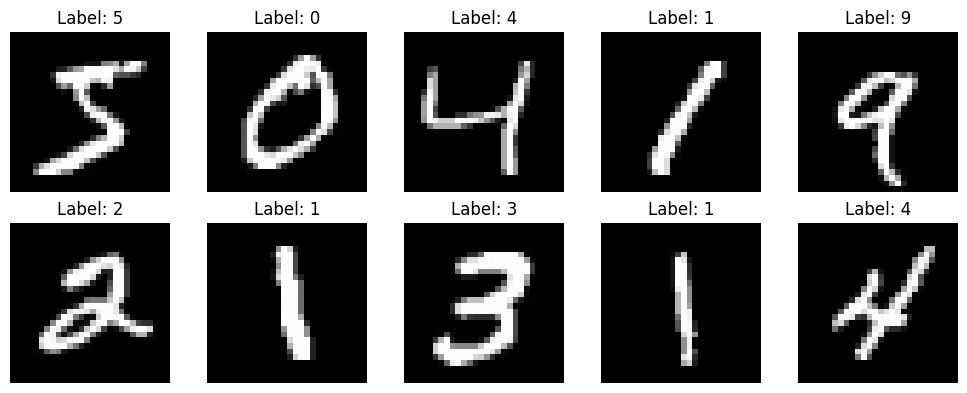

In [16]:
import matplotlib.pyplot as plt

(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Visualizing Model Predictions

In [17]:
def plot_predictions(images, true_labels, pred_labels, num=10):
    import numpy as np
    plt.figure(figsize=(15, 4))
    for i in range(num):
        plt.subplot(2, num//2, i+1)
        plt.imshow(images[i], cmap='gray')
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f"T: {true_labels[i]}, P: {pred_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Exercises

#### 1. Change the Activation Function
Try using `tanh`, `sigmoid`, or `leaky_relu` instead of `relu`. How does it affect training?

#### 2. Add Dropout
Add `Dropout(0.3)` after dense or convolutional layers. Does it help reduce overfitting?

#### 3. Train a CNN on a New Image Dataset
Choose a public dataset: **CIFAR-10**,  and train a CNN model. You can load it using Keras:
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

### 4. Train an LSTM for Text Processing
Choose a small text dataset (e.g., IMDB movie reviews from Keras).
👉 Tokenize the data, pad the sequences, and use an `Embedding` + `LSTM` model to classify text.

```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
```
👉 Build and train a sequential model using `Embedding` + `LSTM` + `Dense`.

---
 *Tip:* For each dataset, remember to normalize inputs, convert labels to one-hot encoding if needed, and evaluate accuracy and loss.


In [ ]:
#Exercice 1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU

# Prétraitement
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('tahn')

# Fonction d’activation à tester
activation_choice = 'tanh'  # Peut être 'sigmoid' ou 'relu'

# Modèle simple MLP
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    Activation(activation_choice),  # ou remplacer par LeakyReLU()
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

print("-----------------------------------------")
print('sigmoid')

# Fonction d’activation à tester
activation_choice = 'sigmoid'  # Peut être 'sigmoid' ou 'relu'

# Modèle simple MLP
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    Activation(activation_choice),  # ou remplacer par LeakyReLU()
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

print("-----------------------------------------")
print('leaky relu')

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

tahn


c:\Users\sivak\Documents\Sup de Vinci\Data Science\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8639 - loss: 0.4714 - val_accuracy: 0.9466 - val_loss: 0.1878
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9503 - loss: 0.1689 - val_accuracy: 0.9626 - val_loss: 0.1356
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9691 - loss: 0.1083 - val_accuracy: 0.9681 - val_loss: 0.1114
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9773 - loss: 0.0790 - val_accuracy: 0.9686 - val_loss: 0.1059
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9855 - loss: 0.0562 - val_accuracy: 0.9713 - val_loss: 0.0957
-----------------------------------------
sigmoid
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8230 - loss: 0.7159 - val_accuracy: 0.9317 - val_loss: 0.2437
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9362 - loss: 0.2274 - val_accuracy: 0.9467 - val_loss: 0.1858
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms

c:\Users\sivak\Documents\Sup de Vinci\Data Science\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8665 - loss: 0.4710 - val_accuracy: 0.9527 - val_loss: 0.1693
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9539 - loss: 0.1563 - val_accuracy: 0.9620 - val_loss: 0.1328
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9702 - loss: 0.1028 - val_accuracy: 0.9688 - val_loss: 0.1107
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9784 - loss: 0.0727 - val_accuracy: 0.9668 - val_loss: 0.1094
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9831 - loss: 0.0571 - val_accuracy: 0.9712 - val_loss: 0.0982


In [21]:
#Exercice 2

from tensorflow.keras.layers import Dropout

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout pour régularisation
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8294 - loss: 0.5834 - val_accuracy: 0.9516 - val_loss: 0.1722
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9428 - loss: 0.1947 - val_accuracy: 0.9637 - val_loss: 0.1262
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9578 - loss: 0.1377 - val_accuracy: 0.9683 - val_loss: 0.1097
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9652 - loss: 0.1154 - val_accuracy: 0.9734 - val_loss: 0.0945
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9687 - loss: 0.1014 - val_accuracy: 0.9743 - val_loss: 0.0892


In [22]:
#Exercice 3

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Chargement et prétraitement
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# CNN
cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10, validation_split=0.2)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


c:\Users\sivak\Documents\Sup de Vinci\Data Science\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.3476 - loss: 1.7854 - val_accuracy: 0.5218 - val_loss: 1.3565
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5373 - loss: 1.3042 - val_accuracy: 0.5784 - val_loss: 1.2208
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5785 - loss: 1.1971 - val_accuracy: 0.5722 - val_loss: 1.2237
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6030 - loss: 1.1315 - val_accuracy: 0.5957 - val_loss: 1.1627
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6230 - loss: 1.0774 - val_accuracy: 0.6051 - val_loss: 1.1590
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6358 - loss: 1.0461 - val_accuracy: 0.6128 - val_loss: 1.1296
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.6507 - loss: 1.0004 - val_accuracy: 0.5997 - val_loss: 1.1534
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6562 -

In [23]:
#Exercice 4

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Chargement
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Modèle LSTM
lstm = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train, y_train, epochs=5, validation_split=0.2)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5


c:\Users\sivak\Documents\Sup de Vinci\Data Science\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.7087 - loss: 0.5280 - val_accuracy: 0.8492 - val_loss: 0.3592
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8952 - loss: 0.2664 - val_accuracy: 0.8382 - val_loss: 0.3682
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9323 - loss: 0.1811 - val_accuracy: 0.8376 - val_loss: 0.3889
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9575 - loss: 0.1244 - val_accuracy: 0.8324 - val_loss: 0.4236
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.9687 - loss: 0.0895 - val_accuracy: 0.8336 - val_loss: 0.5854
